# Exploring the ChatGPT API

## Some opening questions:

1.   What is chatGPT?
2.   What is an API?
3.   Why do we need to accesss chatGPT via an API?

We will answer all these questions before we get started with the lab.

### How we got our API Key

Our API key comes to us via Emory's [Center for AI Learning](https://ailearning.emory.edu/), which has a (paid) agreement with Microsoft and OpenAI to be able to access OpenAI's models, [including the latest GPT-4 models](https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models), via Microsoft's Azure cloud computing serivces.

We can talk more in class about the ethics of this arrangement, but practically speacking, one of the nice things about accessing OpenAI's models through Azure services is that anything we feed into the model is kept private, and not used for future training purposes. (This is not the case with the things you type into the chatGPT web interface, for example).




### How to find our API Key

I've pasted our class's API Key into a document called "azure-api-key.txt" on Canvas. The key is just a string of letters and numbers that will look something like this:

    6617c28c371f0a138f7912a35365564afe538605678Sh-tJuZvwij
    
Note: the key above is just something I made up. It's not the actual key and will not actually work!

When you find the file, copy the key and hang onto it while we run the next two cells. **Please do not share the API key with anyone outside of this class!!!**

## Now let's get started!

First, install the `openai` library with `pip`.



In [ ]:
!pip install openai

The following cell will import the appropriate parts of the `openai` library, along with another library called `getpass` that will ask for the API key and store it for future use in this notebook session. It also sets a few other environment variables.

In [ ]:
import getpass
from openai import AzureOpenAI

AZURE_ENDPOINT = "https://cail-training-canadaeast.openai.azure.com/"
AZURE_API_KEY = getpass.getpass(prompt='Enter AzureOpenAI API key:')
AZURE_MODEL_KEY = "gpt432k"
AZURE_API_VERSION = "2024-03-01-preview"


Now we call the AzureOpenAI constructor to create a new instance of the client that we'll use for the rest of the notebook.

In [ ]:
client = AzureOpenAI(
    azure_endpoint=AZURE_ENDPOINT,
    api_key=AZURE_API_KEY,
    api_version=AZURE_API_VERSION
)


And without further ado, our first query!

In [ ]:
response = client.chat.completions.create( # Use the chat completions endpoint
  model=AZURE_MODEL_KEY,
  messages=[
        {"role": "user", "content": "Say this is a test"}, # Use messages parameter for chat models
    ],
  max_tokens=7,
  temperature=0
)

response

Wait, what? Why is it formatted like that?

Every API returns information in its own format, so best practice is to consult the documentation for that particular endpoint. [Here's what OpenAI has to say about the Chat Completions endpoint](https://platform.openai.com/docs/guides/chat-completions/getting-started).

From that documention, we get a nicely formatted version of the response format and specific instructions about how to extract the response. Here's a screenshot of that info:

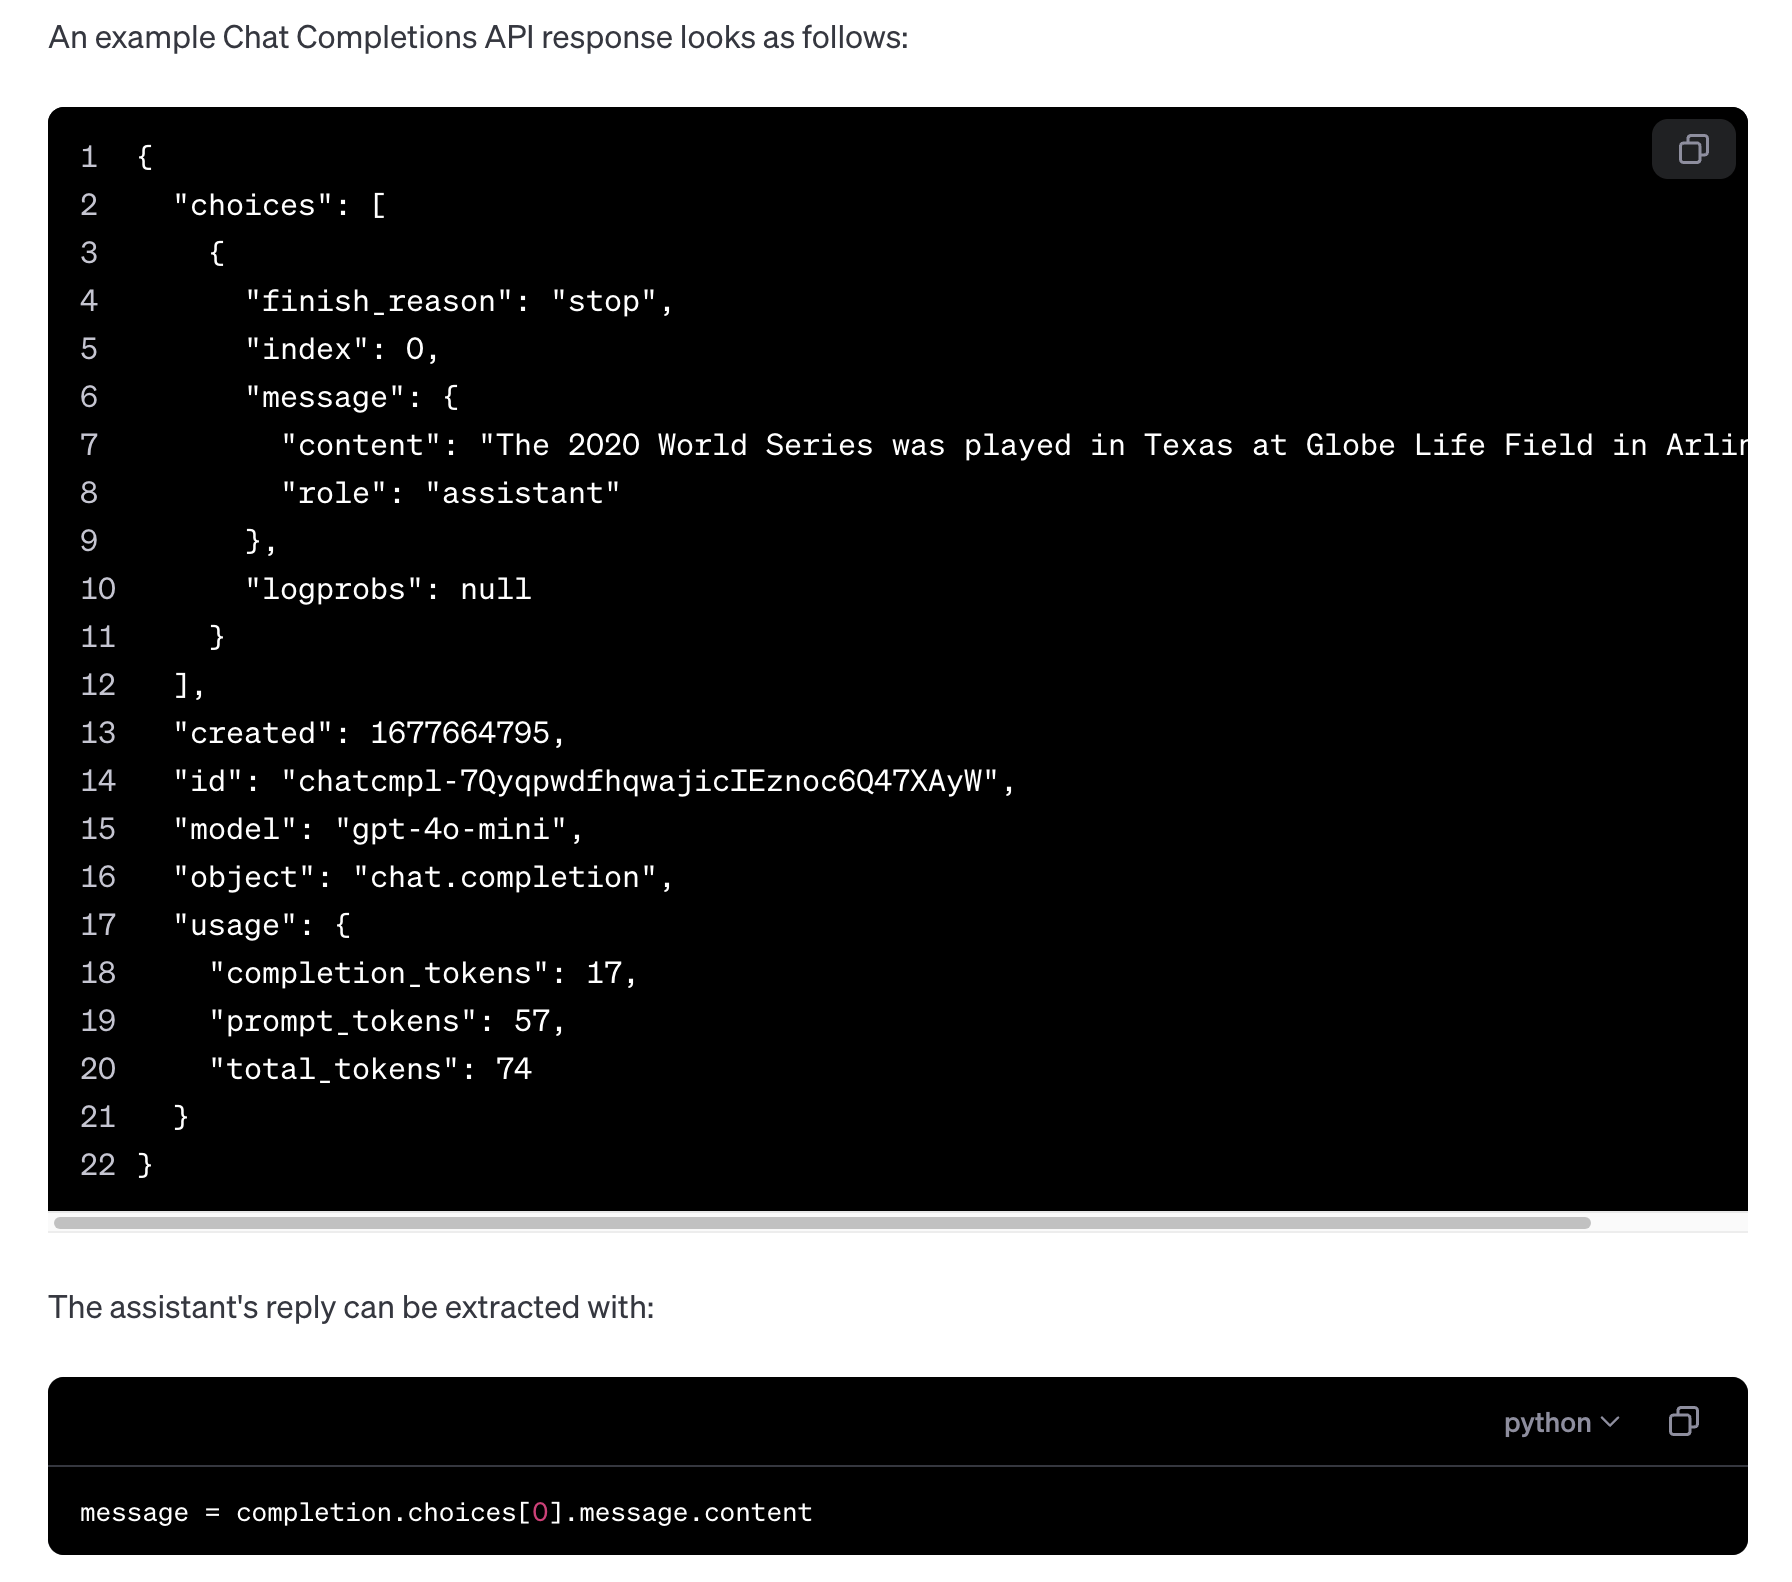





Thanks, OpenAI technical writing team! Let's try it for our own query now:

In [ ]:
response_text = response.choices[0].message.content

response_text


Now that we know how to send queries via the API and parse the response, we can move on

## Prompting

This section of the notebook covers various prompting strategies: **zero-shot prompting**, **few-shot prompting**, and **chain-of-thought prompting**. Let's get started.

### Zero-Shot Prompting

> MONSIEUR JOURDAIN: Oh, really? So when I say: Nicole bring me my slippers and fetch my nightcap,” is that prose?

> PHILOSOPHY MASTER: Most clearly.

> MONSIEUR JOURDAIN: Well, what do you know about that! These forty years now I’ve been speaking in prose without knowing it!

Much like this famous exchange from Molière's *Le Bourgeois gentilhomme*, the famous seventeenth century social satire, you have likely already been using zero-shot prompting if you've ever entered a query into the chatGPT web interface. "Zero-shot" in this context just means that you're asking the model a question (or giving it a "task" in more CS-y terms) without any previous examples or additional training.

With this knowledge, I bet you can guess what "one-shot prompting" entails, as well as "few-shot prompting." It's almost as if I one-shot prompted all of you!

But, back to the subject at hand.

Why is zero-shot prompting preferable? Well, last class, we talked about how AI Dungeon began by fine-tuning its model on a smaller curated dataset of fan fiction. While that resulted in a very satisfying game to play, since the text it generated was very well aligned with D&D style language, but it was (and remains) computationally intensive to fine-tune a pretrained model.

With prompting (zero-shot or otherwise), the base model's parameters are left untouched. This results in a much faster workflow, albeit sometimes a less accurate one. Even still, prompting should always be the first thing you try, since it's likely good enough and it's far better in terms of energy costs, as we also discussed last class.

Before we set up our particular example of zero-shot learning, let's try out an easy example to see how it works.

### An easy example

Recall that LLMs take input text and then output the most likely next token(s) of that text. So the best way to guide the model to the most likely output is to craft your prompt in a way that sets the model up for success.

For example, okra is a vegetable that elicits a lot of strong opinions. Say you wanted to survey some of the responses that people on the internet (which is what you need to presume is informing any genAI response) think about okra. You might do something like this:

In [ ]:
response = client.chat.completions.create( # Use the chat completions endpoint
  model=AZURE_MODEL_KEY,
  messages=[
        {"role": "user", "content": "Okra is "}, # Use messages parameter for chat models
    ],
  max_tokens=7,
  temperature=1, # range is 0-2. this is a hyperparameter that shifts the probability distribution of the next token before it's selected.
                 # < 1 means that tokens that were already more probable get more probable;
                 # > 1 means that the probabilities start to even out, approaching a uniform distribution
  n=5  # number of choices to return
)

for choice in response.choices:
    print(choice.message.content)


But because our prompt was a little vague, we're only getting definitions. How might we improve it?

In [ ]:
response = client.chat.completions.create( # Use the chat completions endpoint
  model=AZURE_MODEL_KEY,
  messages=[
        {"role": "user", "content": "YOUR BETTER PROMPT HERE"}, # Use messages parameter for chat models
    ],
  max_tokens=100, # up the number of tokens for a longer answer, remove additional responses below
  temperature=1, # range is 0-2. this is a hyperparameter that shifts the probability distribution of the next token before it's selected.
                 # < 1 means that tokens that were already more probable get more probable;
                 # > 1 means that the probabilities start to even out, approaching a uniform distribution
  # n=5  # number of choices to return
)

for choice in response.choices:
    print(choice.message.content)

### Actual reasons to use zero-shot (or other forms of) prompting

The reasons to use zero (or few) shot prompting aren't usually to solicit opinions about okra. Prompting can be used for many basic NLP tasks, including machine translation, named entity recognition, document classification, cloze (fill-in-the-blank) questions, and more. Let's very briefly try out zero-shot, few-shot, and chain-of-thought promopting with an NLP task we might actually want to do, which is standardizing the format of some of the intros in our class intros dataset. (I'm going to use fake intros that resemble the format of our class intro dataset so that no one in particular feels called out).

We'll also structure our code a bit more so that we can work with resuable functions rather than just inline code.

Let's start with our (synthetic) data:

In [ ]:
# here's some data
intro1 = '''\
My partner is Cindy. She uses she/her/hers pronouns. \
She’s a senior, majoring in QSS and Physics. She \
hopes to learn more coding skills and apply them to NLP.
'''

intro2 = '''\
Name: Katherine
Pronouns: She/her
Year: Junior
Major: QSS and Econ
One thing you are hoping to get out of this class: \
Getting more familiar with how to make text into data \
and building your own AI chatbot
'''

intro3 = '''\
"My name is Octavia. My pronouns are she/her. I am a \
sophomore and my major is BBA QSS. One thing that I'm \
hoping to get out of this class is to learn more about \
generative AI and what goes on kind of behind-the-scenes \
of popular Gen AI tools like Chat GPT."
'''

# put them in a list for future retreival
intros = [intro1, intro2, intro3]

# check the first one to make sure it looks ok
intros[0]

Now let's define our first template--which is just a fancy way of referring to a prompt:

In [ ]:
zero_shot_prompt_template = '''\
Format the following introduction so that it is in question/answer form \
with each question/answer pair on a single line. Use a : to separate the \
question from the answer. Here is the introduction:
'''

And let's define a function that takes the template and an example and merges them into a prompt:

In [ ]:
def construct_no_shot_prompt (prompt_template, example):
  return prompt_template + example

And another that queries chatGPT:

In [ ]:
def query_chatGPT (prompt):
  response = client.chat.completions.create( # Use the chat completions endpoint
    model=AZURE_MODEL_KEY,
    messages=[
      {"role": "user", "content": prompt}, # Use messages parameter for chat models
    ],
    max_tokens=200, # up the number of tokens for a longer answer, remove additional responses below
    temperature=1
  )

  response_text = response.choices[0].message.content

  return(response_text)



And now let's try it out:

In [ ]:
prompt = construct_no_shot_prompt(zero_shot_prompt_template, intros[0])

print(query_chatGPT(prompt))

Close! But we could make it a little better by giving it a specific example of what we're looking for. Enter *few-shot* prompting!

Here's an example one-shot prompt template:

In [ ]:
few_shot_prompt_template = '''\
Format the following introduction so that it is in question/answer form \
with each question/answer pair on a single line. Use the following format:

Name:
Pronouns:
Year:
Major:
Goal for class:

Here is the introduction to format:
'''

And let's see how we do:

In [ ]:
prompt = construct_no_shot_prompt(few_shot_prompt_template, intros[0])

print(query_chatGPT(prompt))

Not bad! Now there's just one more thing to do, which is to batch-process all of the intros in our teeny dataset. Can you do this on your own?

While we're not going to cover any more versions of prompting in class, there is one additional form of prompting you should know about, which is chain-of-thought prompting. This technique was developed by [a team at Google led by Jason Wei](https://arxiv.org/abs/2201.11903). The basic idea is to demonstrate to the model how to break up a complicated task into a series of simpler intermediate steps. Here is an example from the original paper:

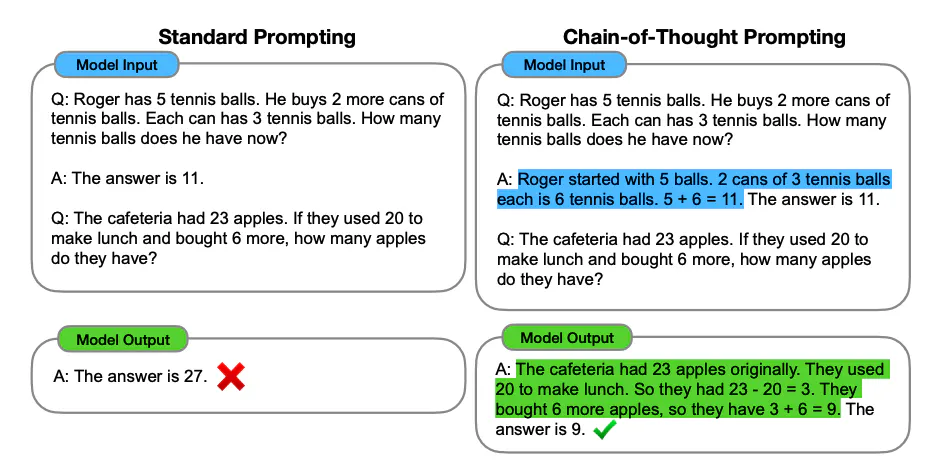



There are various theories about why this works, but at an intuitive level, the idea is that it keep the model on a narrower path, generating output closer to what is intended at each step of the way. Neat, right?!   

Oh and depending on the task, you can also combine it with few-shot prompting for better results.

Here is another example from my own field, digital humanities, in which [Ted Underwood uses this strategy to measure the passage of time in fiction](https://tedunderwood.com/2023/03/19/using-gpt-4-to-measure-the-passage-of-time-in-fiction/). Which of stop and think for a minute, is a task that for a human is quite hard--especially at scale!  

Here is the prompt that Ted used:

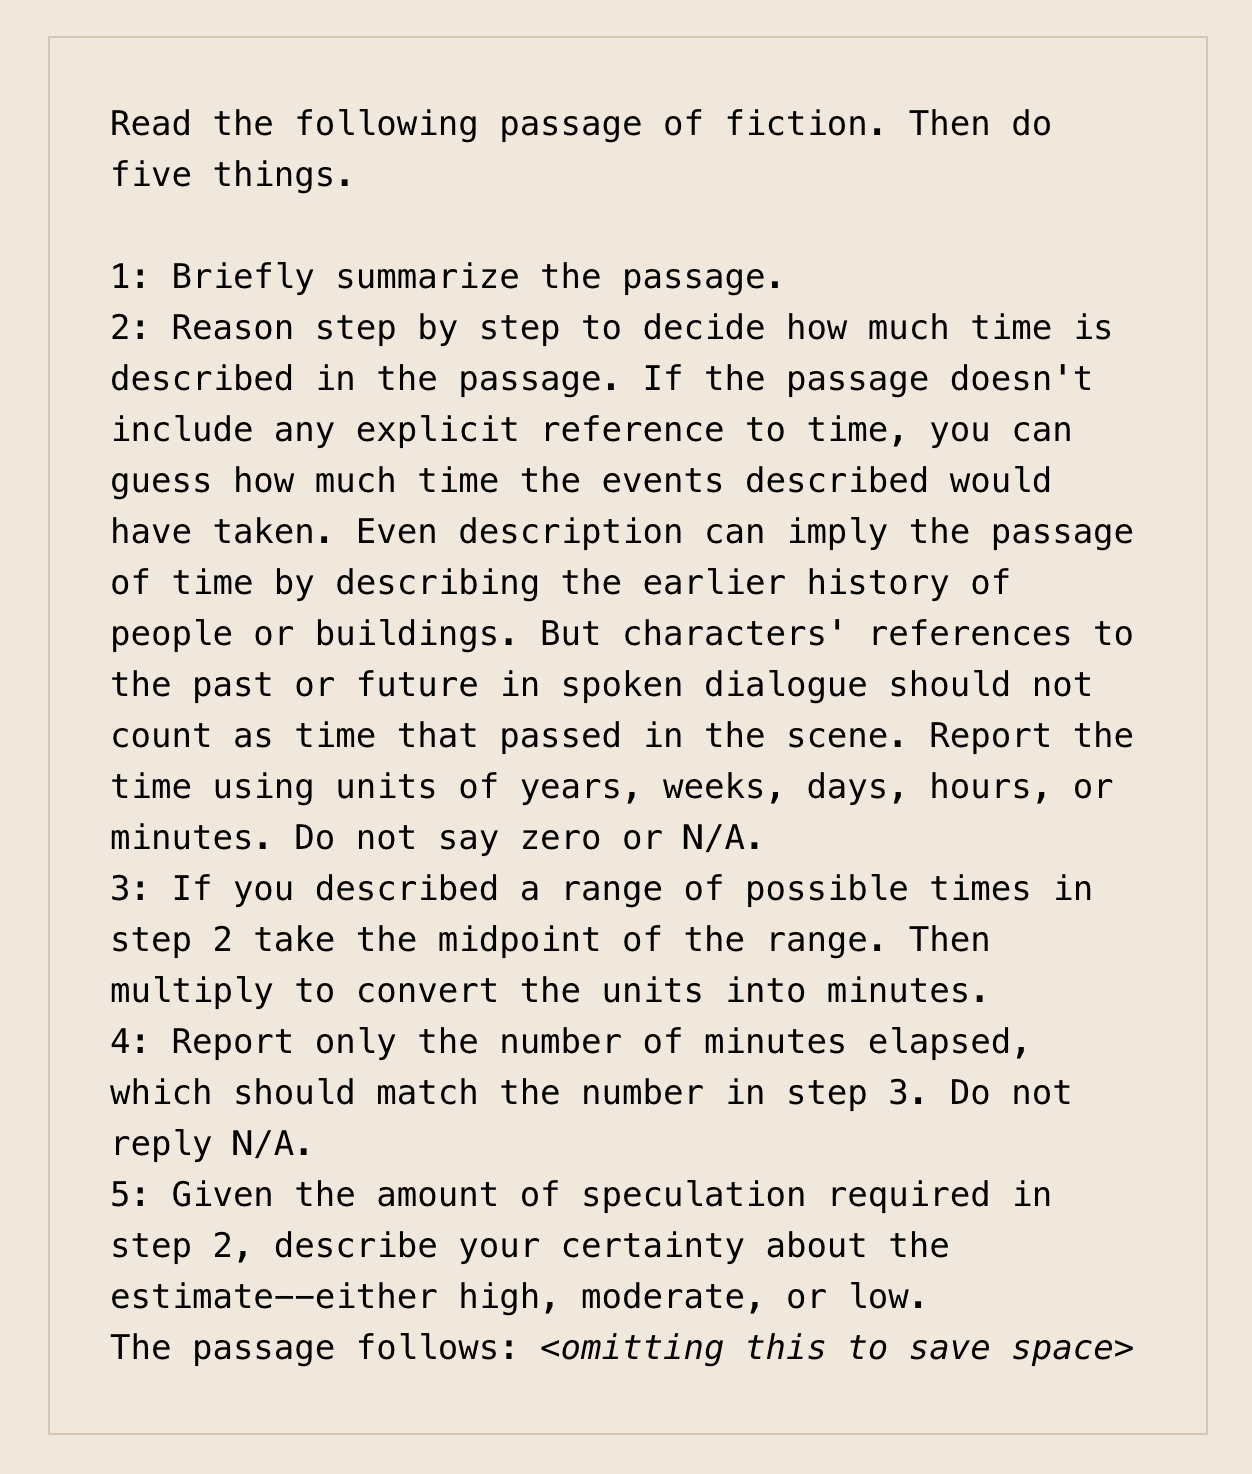

And here's an example of what the output looks like:

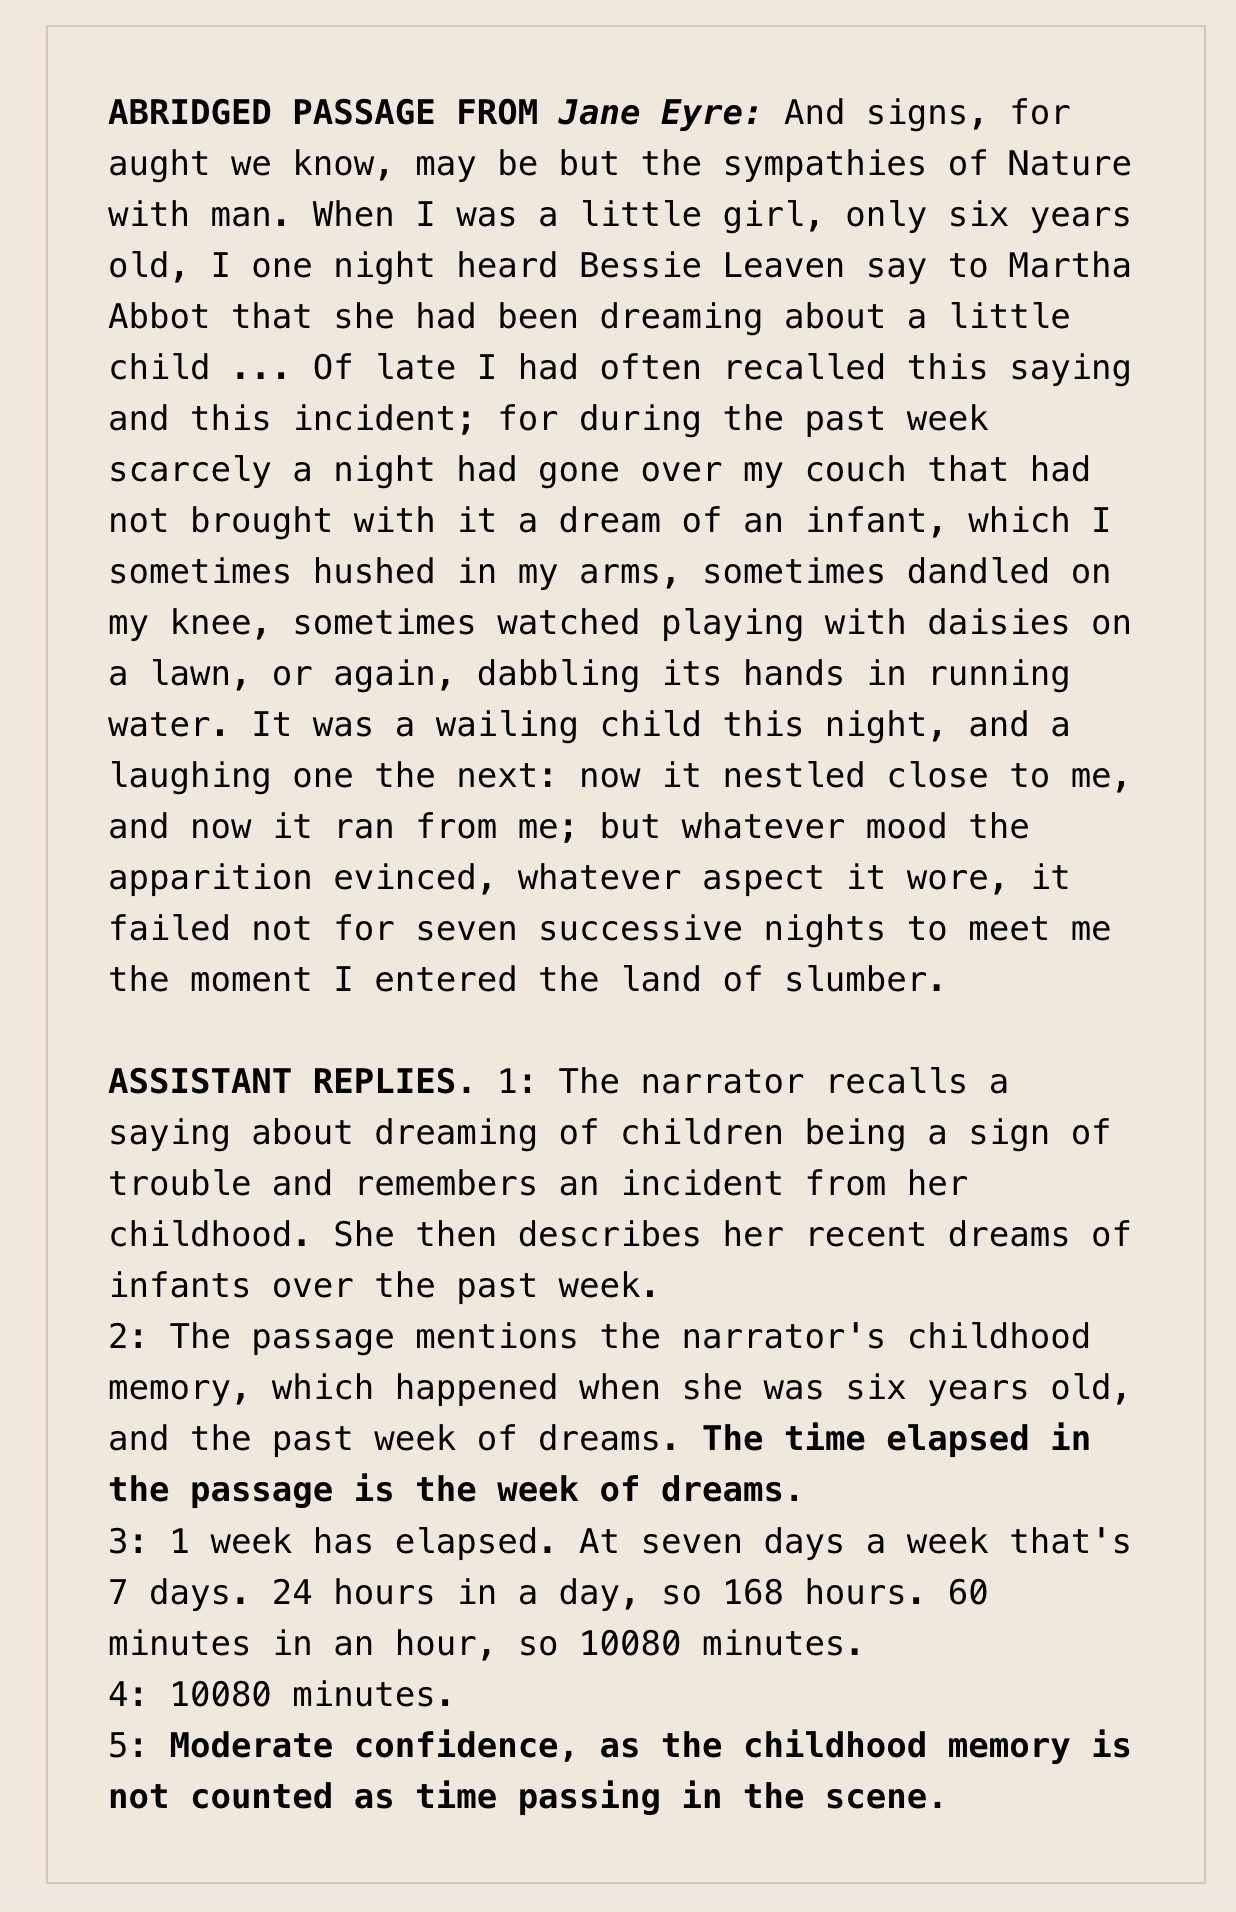

If you're interested in learning more, you can check out Ted's blog post describing the experiment [here](https://tedunderwood.com/2023/03/19/using-gpt-4-to-measure-the-passage-of-time-in-fiction/).

Oh and to do the question/answer format like the one initially proposed by Wei et al., you need to use a slightly different structure for feeding the prompt into chatGPT that involves a "user" (who is the querier) and an "assistant" that is the chatbot, like so:

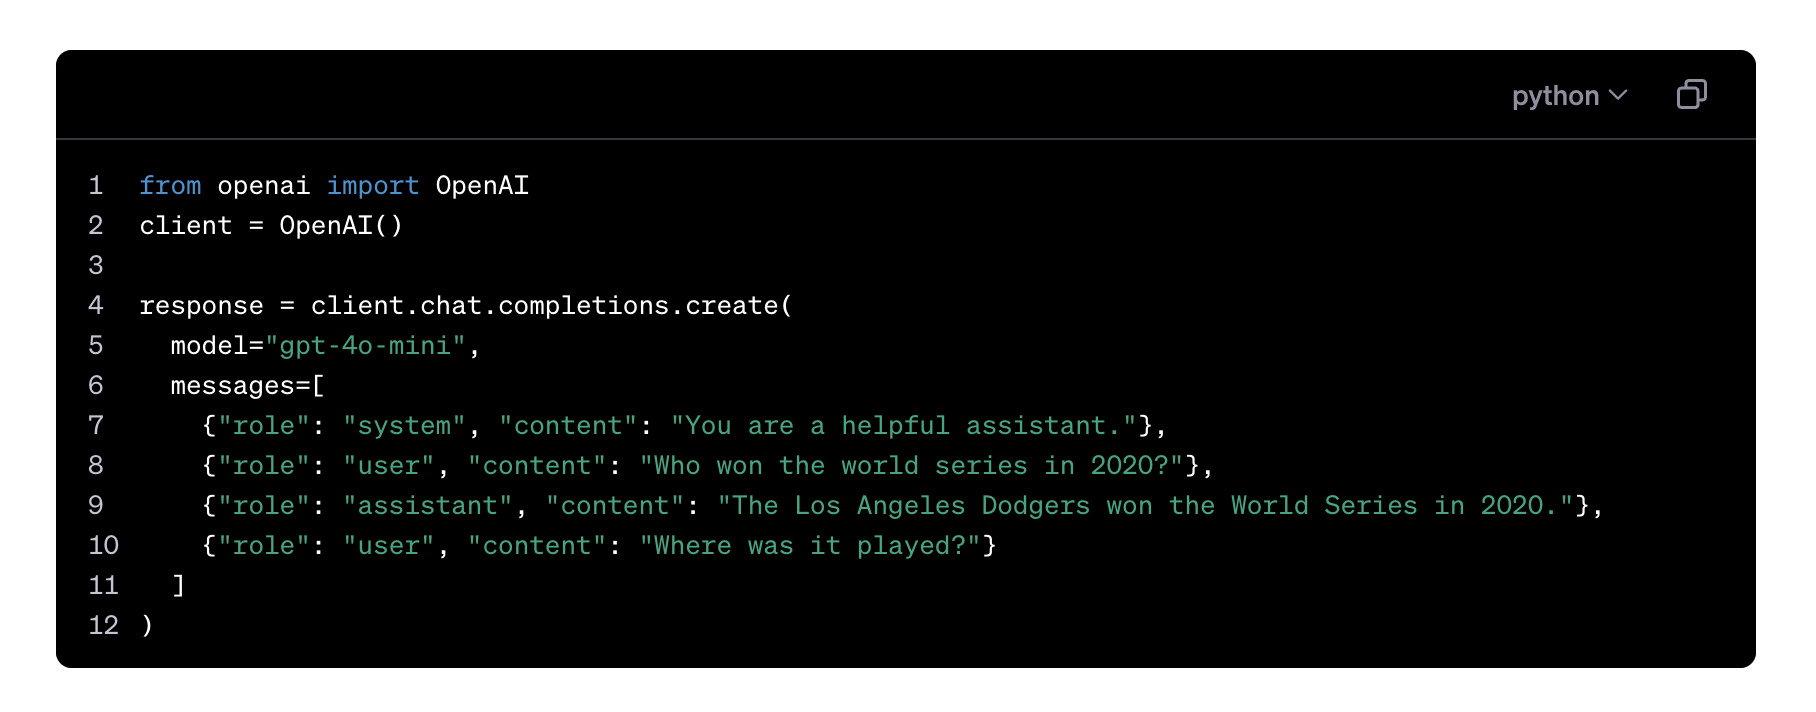

(This screenshot from the trusty [OpenAI API documentation](https://platform.openai.com/docs/guides/chat-completions/getting-started), which--again--is always a crucial source of knowledge when you're getting started working with a new API--or even when you've worked with one a lot before!  


*I wrote version 1.0 of this notebook in Fall 2024 thanks to OpenAI API access provided by Joe Sutherland at Emory's [CAIL](https://ailearning.emory.edu/) and materials synthesized from the AI for Humanists [Zero-Shot Prompting tutorial](https://aiforhumanists.com/tutorials/) and Sandeep Soni's [previous QTM 340 course materials](https://github.com/sandeepsoni/QTM340).*